In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import numpy as np
import calendar
import re

import matplotlib.style as style
style.available
style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
health_df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results_2019.csv')

In [3]:
health_df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,06/11/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,6.0,A,06/11/2019,06/19/2019,Cycle Inspection / Re-inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,06/11/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,6.0,A,06/11/2019,06/19/2019,Cycle Inspection / Re-inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,06/11/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,6.0,A,06/11/2019,06/19/2019,Cycle Inspection / Re-inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,NaN,NaN,06/19/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaN,06/19/2019,Cycle Inspection / Initial Inspection


In [4]:
# CAMIS = Unique Identifier
# DBA = Restaurant Name (doing business as)
# Boro = Borough 
# Building
# Street 
# Cuisine Description = Type of Cuisine
# Inspection Date = maybe limit this to 2019 
# Action = Action associated with each inspection
# Violation Code = 
# Violation Description
# Critical Flag = if critical, the restaurant is more likely to spread foodborne illness
# Score
# Grade
# Grade Date
# Record Date
# Inspection Type

In [5]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380694 entries, 0 to 380693
Data columns (total 18 columns):
CAMIS                    380694 non-null int64
DBA                      380106 non-null object
BORO                     380694 non-null object
BUILDING                 380449 non-null object
STREET                   380691 non-null object
ZIPCODE                  375200 non-null float64
PHONE                    380679 non-null object
CUISINE DESCRIPTION      380694 non-null object
INSPECTION DATE          380694 non-null object
ACTION                   379237 non-null object
VIOLATION CODE           374859 non-null object
VIOLATION DESCRIPTION    371785 non-null object
CRITICAL FLAG            380694 non-null object
SCORE                    363160 non-null float64
GRADE                    193215 non-null object
GRADE DATE               191188 non-null object
RECORD DATE              380694 non-null object
INSPECTION TYPE          379237 non-null object
dtypes: float64(2), int6

In [6]:
health_df.describe()

,CAMIS,ZIPCODE,SCORE
count,3.806940e+05,375200.000000,363160.000000
mean,4.584518e+07,10677.955456,19.868529
std,4.423544e+06,602.415251,14.298106
min,3.007544e+07,10000.000000,-1.000000
25%,4.135828e+07,10022.000000,11.000000
50%,5.000196e+07,10468.000000,15.000000
75%,5.004930e+07,11229.000000,25.000000
max,5.009449e+07,30339.000000,166.000000


In [7]:
health_2019_df = health_df[health_df["INSPECTION DATE"] > "01/01/2019"]
health_2019_df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,06/11/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,6.0,A,06/11/2019,06/19/2019,Cycle Inspection / Re-inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,06/11/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,6.0,A,06/11/2019,06/19/2019,Cycle Inspection / Re-inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,06/11/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,6.0,A,06/11/2019,06/19/2019,Cycle Inspection / Re-inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,NaN,NaN,06/19/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,NaN,NaN,06/19/2019,Cycle Inspection / Initial Inspection


In [13]:
health_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379237 entries, 0 to 380447
Data columns (total 18 columns):
CAMIS                    379237 non-null int64
DBA                      379237 non-null object
BORO                     379237 non-null object
BUILDING                 378997 non-null object
STREET                   379237 non-null object
ZIPCODE                  373755 non-null float64
PHONE                    379224 non-null object
CUISINE DESCRIPTION      379237 non-null object
INSPECTION DATE          379237 non-null object
ACTION                   379237 non-null object
VIOLATION CODE           374859 non-null object
VIOLATION DESCRIPTION    371785 non-null object
CRITICAL FLAG            379237 non-null object
SCORE                    363160 non-null float64
GRADE                    193215 non-null object
GRADE DATE               191188 non-null object
RECORD DATE              379237 non-null object
INSPECTION TYPE          379237 non-null object
dtypes: float64(2), int6

In [21]:
# health_2019_df["INSPECTION DATE"].unique()

In [8]:
health_scatter = health_2019_df[["CUISINE DESCRIPTION","SCORE"]]

In [9]:
health_scatter.head()

,CUISINE DESCRIPTION,SCORE
0,Bakery,6.0
1,Bakery,6.0
2,Bakery,6.0
3,Bakery,14.0
4,Bakery,14.0


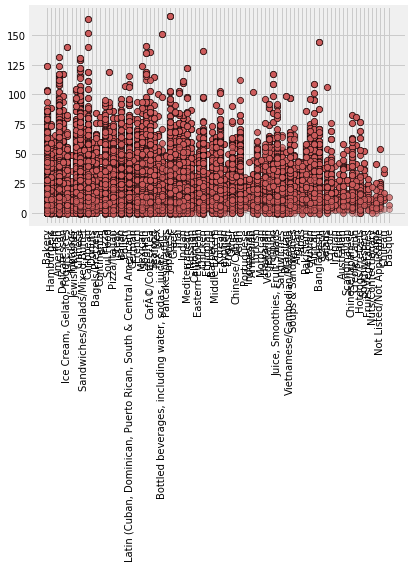

In [17]:
plt.scatter(health_scatter["CUISINE DESCRIPTION"],health_scatter["SCORE"],c="indianred",edgecolors="black", alpha = .50)
plt.xticks(rotation="vertical")
# plt.ylim(0,300000) #for y axis
# #plt.xlim(0, 100000) #for x axis
plt.show()

In [12]:
# plt.bar(health_scatter["CUISINE DESCRIPTION"],health_scatter["SCORE"],)

#Try histogram
# plt.hist(health_scatter["SCORE"], bins='auto')  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# plt.xlabel("Sales TY (millions)")
# plt.ylabel("Store Count")
# plt.show()

In [ ]:
# clean_branded_food_df = branded_food_df[['fdc_id', 'brand_owner', 'ingredients', 'branded_food_category']].copy()
# clean_branded_food_df.head()

# ingred_df.dropna()
# ingred_df.count()

# create new columns
# ingred_df["ingredient_count"] = ingredient_count2
# ingred_df["organic_count"] = organic_count2
# Try to slim down dataframe to ST_CD = GA and plot
# georgia_df = data_sister[data_sister["ST_CD"] == "GA"]
# georgia_df.head()